## Project work, part 1 - Dashboard basics

Start by importing neseccary libaries. Then we load the weather data from a CSV file using Pandas. Convert the "time" column to datetime format.
Check the data structure with `df.info()` and preview with `df.head()`

In [3]:
import numpy as np
import pandas as pd


# Read in the CSV-file
df = pd.read_csv(r"C:\Users\abdio\IND320_Assignments\data\open-meteo-subset.csv")

# Convert 'time' to datetime
df["time"] = pd.to_datetime(df["time"], errors="coerce")

# Check the data is read in 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB
None


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


# Basic Summary

In [4]:
# First rows
display(df.head(10))

# Statistics for the numerical columns
display(df.describe().T)

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284
5,2020-01-01 05:00:00,-2.8,0.0,10.3,22.6,286
6,2020-01-01 06:00:00,-2.8,0.0,9.6,21.8,286
7,2020-01-01 07:00:00,-2.9,0.0,9.7,20.7,284
8,2020-01-01 08:00:00,-2.8,0.0,9.4,20.5,284
9,2020-01-01 09:00:00,-2.7,0.0,9.3,19.5,284


,count,mean,min,25%,50%,75%,max,std
time,8760,2020-07-01 11:30:00,2020-01-01 00:00:00,2020-04-01 05:45:00,2020-07-01 11:30:00,2020-09-30 17:15:00,2020-12-30 23:00:00,NaN
temperature_2m (°C),8760.0,-0.394909,-19.3,-4.9,-1.0,4.1,19.9,6.711903
precipitation (mm),8760.0,0.222854,0.0,0.0,0.0,0.2,5.8,0.493747
wind_speed_10m (m/s),8760.0,3.661689,0.1,1.8,3.3,5.1,13.6,2.25321
wind_gusts_10m (m/s),8760.0,8.300719,0.2,4.5,7.7,11.5,28.7,5.098909
wind_direction_10m (°),8760.0,212.209589,0.0,128.0,238.0,292.0,360.0,91.37198


# Plot each column separately

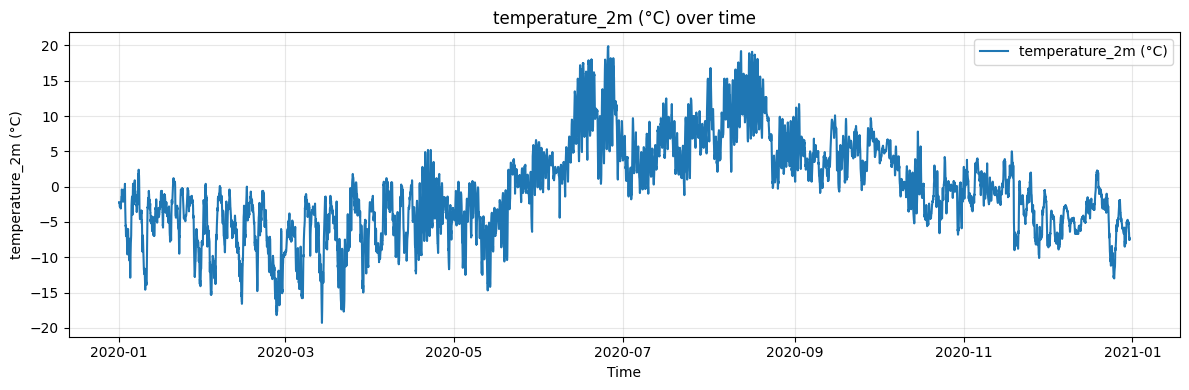

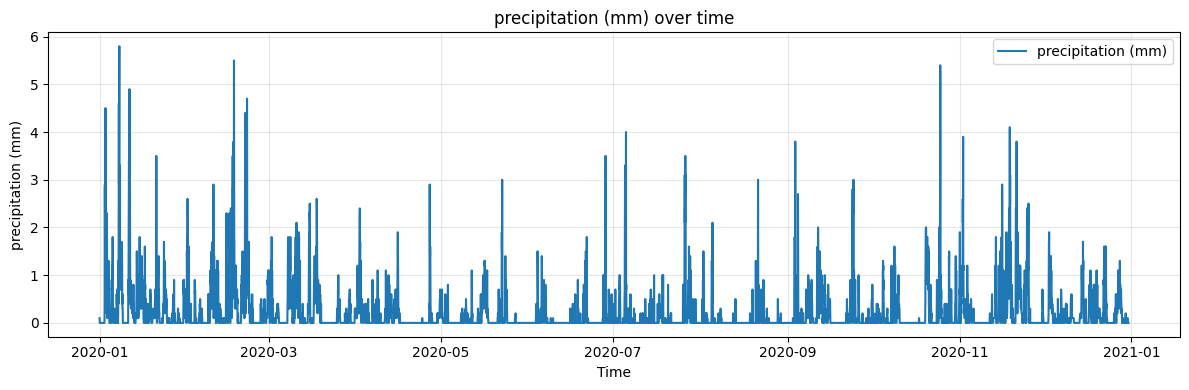

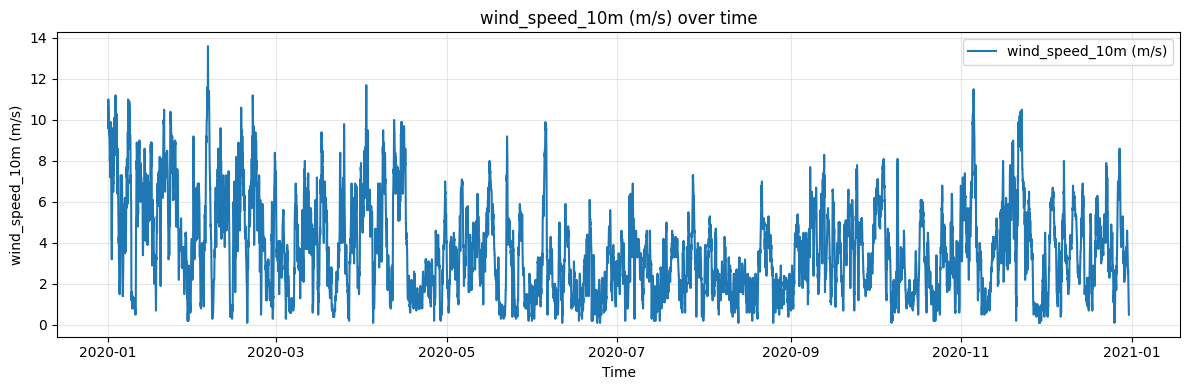

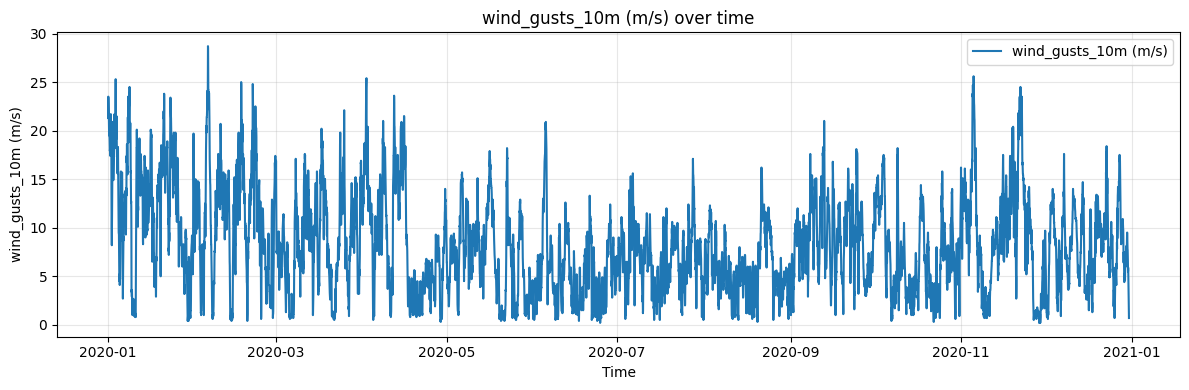

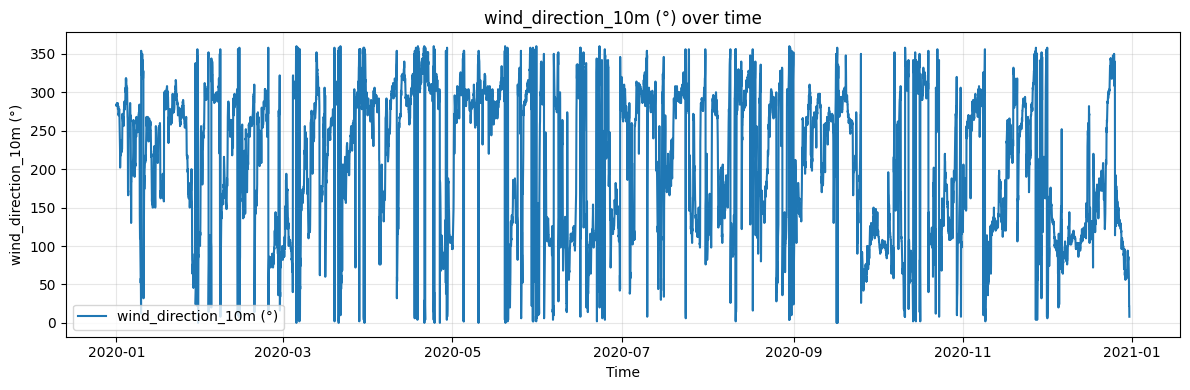

In [5]:
import matplotlib.pyplot as plt

# Find all numerical columns in the dataset
numeric_cols = df.select_dtypes(include=["number"]).columns

# Plot each column seperat 
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.plot(df["time"], df[col], label=col, color="tab:blue")
    plt.title(f"{col} over time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

 # Plot all columns together

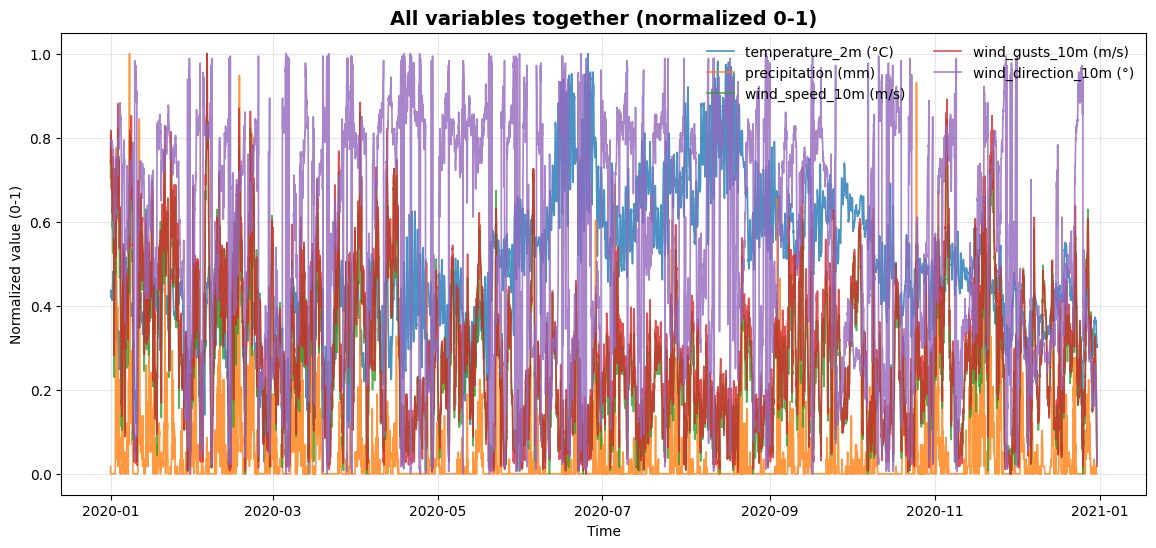

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Read and prepare
df = pd.read_csv(r"C:\Users\abdio\IND320_Assignments\data\open-meteo-subset.csv")
df["time"] = pd.to_datetime(df["time"], errors="coerce")
df = df.dropna(subset=["time"]).sort_values("time").reset_index(drop=True)

# 2) Numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
assert numeric_cols, "No numeric columns found."

# 3) Min-max normalize each series to [0, 1]
df_norm = df.copy()
for col in numeric_cols:
    mn, mx = df[col].min(), df[col].max()
    df_norm[col] = 0.0 if mx == mn else (df[col] - mn) / (mx - mn)

# 4) Plot each all together 
plt.figure(figsize=(14,6))
for col in numeric_cols:
    plt.plot(df["time"], df_norm[col], linewidth=1.2, alpha=0.8, label=col)

plt.title("All variables together (normalized 0-1)", fontsize=14, fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Normalized value (0-1)")
plt.grid(True, alpha=0.3)
plt.legend(ncol=2, frameon=False)
plt.show()

### Plotting All columns Together

The numeric columns in the dataset were first identified.
Each column was then max-min normalized to scale values between 0 and 1, which allows for comparison despite differing units and ranges.
Finally, all normalized columns were plotted together against time on the same graph, enabling us to observe trends and patterns across all variables simultaneously.